# [Single cell RNA sequencing reveals distinct T cell populations in immune-related adverse events of checkpoint inhibitors](https://pubmed.ncbi.nlm.nih.gov/36513074/)
- Data: [GSE216329](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE216329)

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
    library(patchwork)
    library(celldex)
    library(SingleR)
    library(ShinyCell)
    library(harmony)
    library(glmGamPoi)
    library(stringr)
    })

In [3]:
setwd("/data/nsiegel/projects/2024_06_04_Bukhari.et.al-36513074")

In [85]:
source("/data/nsiegel/projects/scTools/R/process.geo.data.r")

In [86]:
GEOID <- 'GSE216329'
seurat_objects <- process.GEO.data(GEOID)

Found 1 file(s)

GSE216329_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpAEL3sD/GSE216329_series_matrix.txt.gz

Using locally cached version of GPL24676 found here:
/tmp/RtmpAEL3sD/GPL24676.soft.gz 



Removed file paths:
GSE216329/GSM6668932_P5_TN.barcodes.tsv.gz
GSE216329/GSM6668932_P5_TN.matrix.mtx.gz


GSE216329/GSM6668947_P18_T.barcodes.tsv.gz
GSE216329/GSM6668947_P18_T.matrix.mtx.gz




Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with da

In [4]:
load(file = "objects/GSE216329.rda")

In [5]:
length(seurat_objects)
seurat_objects

[1] 46

$GSM6668925_P1_T
An object of class Seurat 
17477 features across 6635 samples within 1 assay 
Active assay: RNA (17477 features, 0 variable features)
 1 layer present: counts

$GSM6668926_P1_TN
An object of class Seurat 
17976 features across 7483 samples within 1 assay 
Active assay: RNA (17976 features, 0 variable features)
 1 layer present: counts

$GSM6668927_P2_T
An object of class Seurat 
15882 features across 5119 samples within 1 assay 
Active assay: RNA (15882 features, 0 variable features)
 1 layer present: counts

$GSM6668928_P2_TN
An object of class Seurat 
14957 features across 2978 samples within 1 assay 
Active assay: RNA (14957 features, 0 variable features)
 1 layer present: counts

$GSM6668929_P4_T
An object of class Seurat 
15916 features across 5487 samples within 1 assay 
Active assay: RNA (15916 features, 0 variable features)
 1 layer present: counts

$GSM6668930_P4_TN
An object of class Seurat 
15713 features across 4587 samples within 1 assay 
Active assay: RNA

The two samples below had naming conventions inconsistent with the rest of the study so that are manually read in below.

In [6]:
# Read the files for the current sample
result <- ReadMtx(
  mtx = "GSE216329/GSM6668932_P5_TN.matrix.mtx.gz",
  cells = "GSE216329/GSM6668932_P5_TN.barcodes.tsv.gz",
  features = "GSE216329/GSM6668932_P5_TN.features.tsv.gz"
)

result@Dimnames[[1]] <- make.unique(result@Dimnames[[1]])
result@Dimnames[[2]] <- make.unique(result@Dimnames[[2]])

# Create Seurat object from the result
GSM6668931 <- CreateSeuratObject(
  counts = result,
  assay = "RNA",
  min.cells = 3,
  min.features = 300
)
GSM6668931

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
16389 features across 6126 samples within 1 assay 
Active assay: RNA (16389 features, 0 variable features)
 1 layer present: counts

In [7]:
# Read the files for the current sample
result <- ReadMtx(
  mtx = "GSE216329/GSM6668947_P18_T.matrix.mtx.gz",
  cells = "GSE216329/GSM6668947_P18_T.barcodes.tsv.gz",
  features = "GSE216329/GSM6668947_P18_T.enes.tsv.gz"
)

result@Dimnames[[1]] <- make.unique(result@Dimnames[[1]])
result@Dimnames[[2]] <- make.unique(result@Dimnames[[2]])

# Create Seurat object from the result
GSM6668947 <- CreateSeuratObject(
  counts = result,
  assay = "RNA",
  min.cells = 3,
  min.features = 300
)
GSM6668947

An object of class Seurat 
14725 features across 2811 samples within 1 assay 
Active assay: RNA (14725 features, 0 variable features)
 1 layer present: counts

In [8]:
obj <- merge(x = seurat_objects[[1]], 
                    y = c(seurat_objects[[2]], seurat_objects[[3]], seurat_objects[[4]], 
                          seurat_objects[[5]], seurat_objects[[6]], seurat_objects[[7]], 
                          seurat_objects[[8]], seurat_objects[[9]], seurat_objects[[10]], 
                          seurat_objects[[11]], seurat_objects[[12]], seurat_objects[[13]], 
                          seurat_objects[[14]], seurat_objects[[15]], seurat_objects[[16]], 
                          seurat_objects[[17]], seurat_objects[[18]], seurat_objects[[19]], 
                          seurat_objects[[20]], seurat_objects[[21]], seurat_objects[[22]], 
                          seurat_objects[[23]], seurat_objects[[24]], seurat_objects[[25]], 
                          seurat_objects[[26]], seurat_objects[[27]], seurat_objects[[28]], 
                          seurat_objects[[29]], seurat_objects[[30]], seurat_objects[[31]], 
                          seurat_objects[[32]], seurat_objects[[33]], seurat_objects[[34]], 
                          seurat_objects[[35]], seurat_objects[[36]], seurat_objects[[37]], 
                          seurat_objects[[38]], seurat_objects[[39]], seurat_objects[[40]], 
                          seurat_objects[[41]], seurat_objects[[42]], seurat_objects[[43]], 
                          seurat_objects[[44]], seurat_objects[[45]], seurat_objects[[46]],
                          GSM6668947, GSM6668931))


# Print the merged object
save(obj, file = file.path("objects", "00.rda"))

Warning message:
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”


In [9]:
load(file = file.path("objects", "00.rda"))
obj <- JoinLayers(obj)
obj[["percent.mt"]] <- PercentageFeatureSet(object = obj, pattern = "^MT-")
obj <- subset(obj, subset = nFeature_RNA > 350 & nFeature_RNA < 5000 & percent.mt < 10)
obj
save(obj, file = file.path("objects", "01.rda"))

An object of class Seurat 
50184 features across 169762 samples within 1 assay 
Active assay: RNA (50184 features, 0 variable features)
 1 layer present: counts

In [10]:
# # Download gene annotation
# load(file = "objects/00.rda")
# mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")
# ensembl_annot <- getBM(attributes=c("ensembl_gene_id","external_gene_name"),
#                        filters = "ensembl_gene_id",
#                        values = rownames(obj), 
#                        mart = mart)
# # Replace blanks with NA
# ensembl_annot <- as.data.frame(apply(ensembl_annot, 2, function(x) gsub("^$|^ $", NA, x)))
# ensembl_annot$external_gene_name[is.na(ensembl_annot$external_gene_name)] <- 
# ensembl_annot$ensembl_gene_id[is.na(ensembl_annot$external_gene_name)]

# # Genes not returned from `getBM` query
# ## Neither Ensembl or common names were returned
# diff <- setdiff(rownames(obj),ensembl_annot$ensembl_gene_id)
# diff

# # Remove genes not returned from `getBM` query from Seurat object
# counts <- GetAssayData(obj, assay = "RNA")
# counts <- counts[-(which(rownames(counts) %in% diff)),]
# obj <- subset(obj, features = rownames(counts))

In [11]:
# RenameGenesSeurat <- function(obj, newnames) {
#   print("Run this before integration. It only changes obj@assays$RNA@counts, @data and @scale.data.")

#   if ("RNA" %in% names(obj@assays)) {
#     RNA <- obj@assays$RNA
#     if (nrow(RNA) == length(newnames)) {
#       if ("counts" %in% names(RNA)) RNA@counts@Dimnames[[1]]         <- newnames
#       if ("data" %in% names(RNA)) RNA@data@Dimnames[[1]]             <- newnames
#       if ("scale.data" %in% names(RNA)) RNA@scale.data@Dimnames[[1]] <- newnames
#     } else {
#       stop("Unequal gene sets: nrow(RNA) != length(newnames)")
#     }
#     obj@assays$RNA <- RNA
#     return(obj)
#   } else {
#     stop("The Seurat object does not contain an RNA assay.")
#   }
# }


In [12]:
# obj <- RenameGenesSeurat(obj = obj, newnames = ensembl_annot$external_gene_name)
# head(rownames(obj))

In [13]:
obj <- SCTransform(obj, ncells = 3000,  variable.features.n = 2000, vst.flavor="v2", method = 'glmGamPoi', conserve.memory = TRUE)
save(obj, file=file.path("objects", "02.rda"))

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 47076 by 169762

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells

Found 415 outliers - those will be ignored in fitting/regularization step


Skip calculation of full residual matrix

Will not return corrected UMI because residual type is not set to 'pearson'

Calculating gene attributes

Wall clock passed: Time difference of 24.09818 secs

Setting min_variance based on median UMI:  0.04

Calculating variance for residuals of type pearson for 47076 genes

Determine variable features

Setting min_variance based on median UMI:  0.16

Calculating residuals of type pearson for 2000 genes



  |======================================================================| 100%


Computing corrected UMI count matrix

Centering data matrix

Getting residuals for block 1(of 57) for counts dataset

Getting residuals for block 2(of 57) for counts dataset

Getting residuals for block 3(of 57) for counts dataset

Getting residuals for block 4(of 57) for counts dataset

Getting residuals for block 5(of 57) for counts dataset

Getting residuals for block 6(of 57) for counts dataset

Getting residuals for block 7(of 57) for counts dataset

Getting residuals for block 8(of 57) for counts dataset

Getting residuals for block 9(of 57) for counts dataset

Getting residuals for block 10(of 57) for counts dataset

Getting residuals for block 11(of 57) for counts dataset

Getting residuals for block 12(of 57) for counts dataset

Getting residuals for block 13(of 57) for counts dataset

Getting residuals for block 14(of 57) for counts dataset

Getting residuals for block 15(of 57) for counts dataset

Getting residuals for block 16(of 57) for counts dataset

Getting residuals fo

In [14]:
# load(file=file.path("objects", "02.rda"))
obj <- RunPCA(obj, npcs = 30, verbose = TRUE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:20)
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:20)
obj <- FindClusters(obj, resolution = 0.5)
save(obj, file=file.path("objects", "03.rda"))

PC_ 1 
Positive:  RP11-301G19.1, PLCB3, S100B, KRTAP10-10, AP001469.9, KRTAP12-1, NDUFAF1, AC136616.1, LL21NC02-21A1.1, LINC00316 
	   LINC00205, C21orf2, AP001059.5, AC240274.1, PFKL, AC136616.3, RP11-706O15.3, AC136352.4, LINC01547, KRTAP12-4 
	   FTCD, COL18A1, AP001476.4, AC171558.2, AP001062.7, KRTAP10-2, ITGB2-AS1, MT-ND1, AC141272.1, AP001062.9 
Negative:  CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, ENSG00000156508, ENSG00000251562, ENSG00000166710, ENSG00000147403, CD27-C0154-5p-B304139, ENSG00000112306, ENSG00000137818 
	   ENSG00000198804, ENSG00000075624, ENSG00000229117, ENSG00000167526, ENSG00000142937, ENSG00000108107, ENSG00000144713, ENSG00000156482, ENSG00000108298, ENSG00000142676 
	   ENSG00000164587, ENSG00000149273, ENSG00000145425, ENSG00000133112, ENSG00000234745, ENSG00000198034, ENSG00000143947, ENSG00000198712, ENSG00000105640, ENSG00000198727 
PC_ 2 
Positive:  CD8, HTO.7, HTO.2, HTO.6, HTO.4, CD4.1, HTO.3, HTO.5, HTO.1, HTO.9 
	   CD

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 169762
Number of edges: 5340466

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9767
Number of communities: 49
Elapsed time: 57 seconds


In [15]:
obj

An object of class Seurat 
97260 features across 169762 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



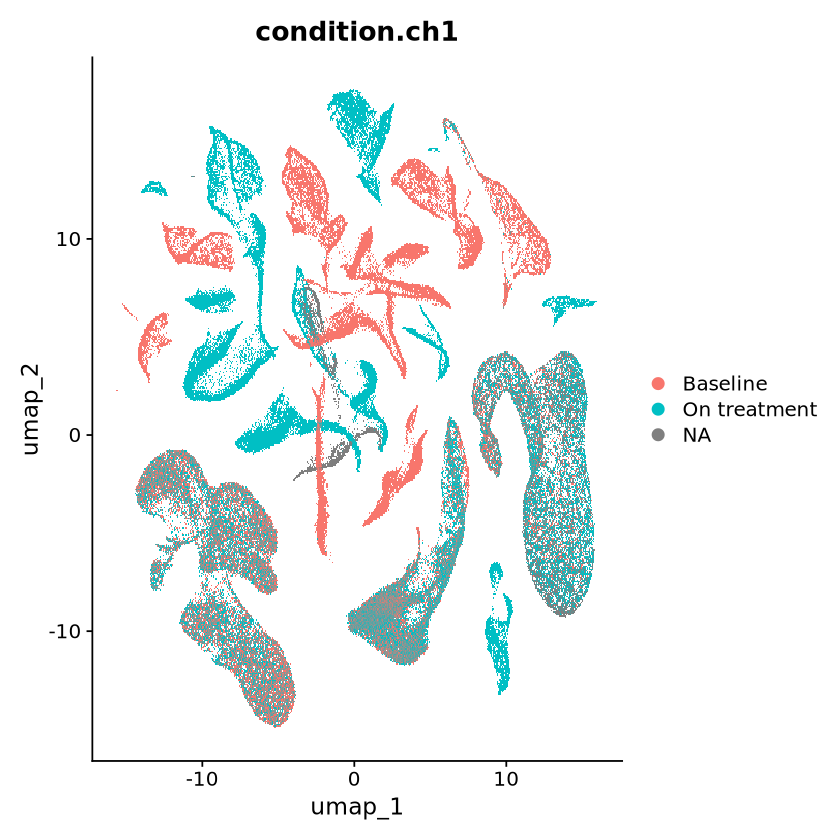

In [16]:
DimPlot(obj, group.by = "condition.ch1")

In [17]:
blueprint.ref <- celldex::BlueprintEncodeData()
monaco.ref <- celldex::MonacoImmuneData()

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache



In [18]:
sce <- LayerData(obj)
blueprint.main <- SingleR(test = sce, assay.type.test = 1, ref = blueprint.ref, labels = blueprint.ref$label.main)
obj@meta.data$blueprint.main <- blueprint.main$pruned.labels
save(obj, file=file.path("objects", "04.rda"))

In [19]:
table(obj@meta.data$blueprint.main)


       Adipocytes        Astrocytes           B-cells      CD4+ T-cells 
             3308              2257              1473             70399 
     CD8+ T-cells      Chondrocytes                DC Endothelial cells 
            36688               196                44                32 
      Eosinophils  Epithelial cells      Erythrocytes       Fibroblasts 
              850                32              1774              1150 
              HSC     Keratinocytes       Macrophages       Melanocytes 
            26163               975               210               355 
  Mesangial cells         Monocytes          Myocytes           Neurons 
              351              5372               884               265 
      Neutrophils          NK cells         Pericytes   Skeletal muscle 
             4709              5004                73              1906 
    Smooth muscle 
              198 

In [20]:
remove_low_count_cells <- function(seurat_obj, metadata_column, threshold = 20) {

  total_counts <- table(seurat_obj@meta.data[[metadata_column]])

  low_count_cells <- names(total_counts[total_counts < threshold])

  seurat_obj <- subset(seurat_obj, idents = low_count_cells, invert = TRUE)

  return(seurat_obj)
}
remove_low_count_cells(seurat_obj = obj, metadata_column = "blueprint.main", threshold = 20)

An object of class Seurat 
97260 features across 169762 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [21]:
table(obj@meta.data$blueprint.main)


       Adipocytes        Astrocytes           B-cells      CD4+ T-cells 
             3308              2257              1473             70399 
     CD8+ T-cells      Chondrocytes                DC Endothelial cells 
            36688               196                44                32 
      Eosinophils  Epithelial cells      Erythrocytes       Fibroblasts 
              850                32              1774              1150 
              HSC     Keratinocytes       Macrophages       Melanocytes 
            26163               975               210               355 
  Mesangial cells         Monocytes          Myocytes           Neurons 
              351              5372               884               265 
      Neutrophils          NK cells         Pericytes   Skeletal muscle 
             4709              5004                73              1906 
    Smooth muscle 
              198 

In [22]:
load(file = "objects/04.rda")
obj <- SetIdent(obj, value = "blueprint.main")
obj <- subset(obj, idents = c("CD8+ T-cells", "B-cells", "CD4+ T-cells", "DC", "Macrophages", "Neutrophils", "Monocytes",
"Eosinophils", "NK cells"), invert = FALSE)

In [23]:
table(obj@meta.data$blueprint.main)


     B-cells CD4+ T-cells CD8+ T-cells           DC  Eosinophils  Macrophages 
        1473        70399        36688           44          850          210 
   Monocytes  Neutrophils     NK cells 
        5372         4709         5004 

In [24]:
sce <- LayerData(obj)
monaco.fine <- SingleR(test = sce, assay.type.test = 1, ref = monaco.ref, labels = monaco.ref$label.fine)
obj@meta.data$monaco.fine <- monaco.fine$pruned.labels
save(obj, file=file.path('objects', '05.rda'))

In [25]:
table(obj@meta.data$monaco.fine)


   Central memory CD8 T cells           Classical monocytes 
                         7459                          2707 
  Effector memory CD8 T cells             Exhausted B cells 
                         3168                            32 
    Follicular helper T cells        Intermediate monocytes 
                         7424                          2468 
        Low-density basophils       Low-density neutrophils 
                            6                           686 
                   MAIT cells       Myeloid dendritic cells 
                         2223                          2773 
                Naive B cells             Naive CD4 T cells 
                          622                         20050 
            Naive CD8 T cells          Natural killer cells 
                         4771                          2263 
      Non classical monocytes   Non-switched memory B cells 
                         1065                            68 
           Non-Vd2 gd T

In [26]:
load(file=file.path('objects', '05.rda'))

# Clean up columns
obj@meta.data$Disease <- obj@meta.data$disease.ch1
obj@meta.data$Condition <- obj@meta.data$condition.ch1
obj@meta.data$Study_CellTypes <- obj@meta.data$cell.type.ch1
obj@meta.data$Disease <- ifelse(str_detect(obj@meta.data$Disease, "Thyroiditis/ Neurotoxicity / Nephritis"), "Thyroiditis/ Neurotoxicity/ Nephritis", obj@meta.data$Disease)
obj@meta.data$Condition <- ifelse(str_detect(obj@meta.data$Condition, "On treatment"), "anti-PD-1", obj@meta.data$Condition)
obj@meta.data$Condition_Disease <- paste(obj@meta.data$Condition, obj@meta.data$Disease, sep = "_")

# Select needed columns
columns_to_keep <-  c("orig.ident", "Disease", "Condition", "Condition_Disease", "Study_CellTypes", "blueprint.main", "monaco.fine")
obj@meta.data <- obj@meta.data[, columns_to_keep, drop = FALSE]

# Remove NA cells
obj <- SetIdent(obj, value = "Condition_Disease")
obj <- subset(obj, idents = c("NA_NA"), invert = TRUE)

save(obj, file=file.path('objects', '06.rda'))

In [ ]:
seu =  obj
scConf = createConfig(seu)
makeShinyApp(seu, scConf,
             gene.mapping = TRUE,
             shiny.title = "Cancer Tcell anti-PD-1 irAEs blood scRNA-seq",
             shiny.dir = "cancer_tcell_anti-pd-1_irAEs_scRNA-seq_GSE216329/",
             gex.assay = "SCT",
             default.multigene = c('LILRB1', 'PDCD1')) 
system("R -e \"shiny::runApp('cancer_tcell_anti-pd-1_irAEs_scRNA-seq_GSE216329')\"")

In [4]:
system("R -e \"shiny::runApp('cancer_tcell_anti-pd-1_irAEs_scRNA-seq_GSE216329')\"")

In [11]:
load(file=file.path('objects', '06.rda'))

In [13]:
unique(obj@meta.data$Disease)

[1] "Arthritis"                            
[2] "Thyroiditis"                          
[3] "No irAE"                              
[4] "Pneumonitis"                          
[5] "Thyroiditis/ Nephritis"               
[6] "Thyroiditis/ Neurotoxicity/ Nephritis"
[7] "Colitis/ Neurotoxicity"

In [17]:
thy <- subset(obj, subset = Disease == "Thyroiditis" | Disease == "No irAE")
thy

An object of class Seurat 
97260 features across 44346 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [18]:
thy <- RunPCA(thy, npcs = 30, verbose = TRUE)
thy <- RunUMAP(thy, reduction = "pca", dims = 1:20)
thy <- FindNeighbors(thy, reduction = "pca", dims = 1:20)
thy <- FindClusters(thy, resolution = 0.5)
save(thy, file=file.path("objects", "Thyroiditis.rda"))

PC_ 1 
Positive:  RP11-301G19.1, PLCB3, NDUFAF1, S100B, KRTAP10-10, AP001469.9, KRTAP12-1, AC136616.1, RP11-706O15.3, LL21NC02-21A1.1 
	   LINC00316, LINC00205, AP001059.5, C21orf2, FTCD, AC240274.1, AC136616.3, PFKL, KRTAP10-2, AC084193.1 
	   LINC01547, AC136352.4, KRTAP12-4, AP001476.4, COL18A1, AC171558.2, AC141272.1, AC110781.3, MT-CO1, AP001062.7 
Negative:  HTO.4, HTO.7, HTO.2, HTO.5, CD4.1, HTO.6, CD8, CD45RA, CD27.1, EEF1A1 
	   MALAT1, RPS12, RPL10, RPL41, MTRNR2L12, RPS4Y1, HTO.1, B2M, MTRNR2L8, TRBV7.2 
	   MT.CO2, FOS, GNB2L1, LTB, JUN, MT.ATP6, TRBV5.1, DUSP1, MT.CO1, TRBV20.1 
PC_ 2 
Positive:  HTO.4, HTO.2, HTO.7, HTO.5, CD8, CD4.1, RP11-301G19.1, NDUFAF1, RP11-706O15.3, AP001469.9 
	   CD27.1, AC136616.1, KRTAP10-10, S100B, FTCD, CD45RA, AC084193.1, LINC00205, KRTAP12-1, AC110781.3 
	   MDC1-AS1, LINC00316, LL21NC02-21A1.1, AP001476.4, AC136616.3, AC141272.1, SUPT20H, AC240274.1, COL18A1, KRTAP12-4 
Negative:  CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 44346
Number of edges: 1427832

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9629
Number of communities: 31
Elapsed time: 6 seconds


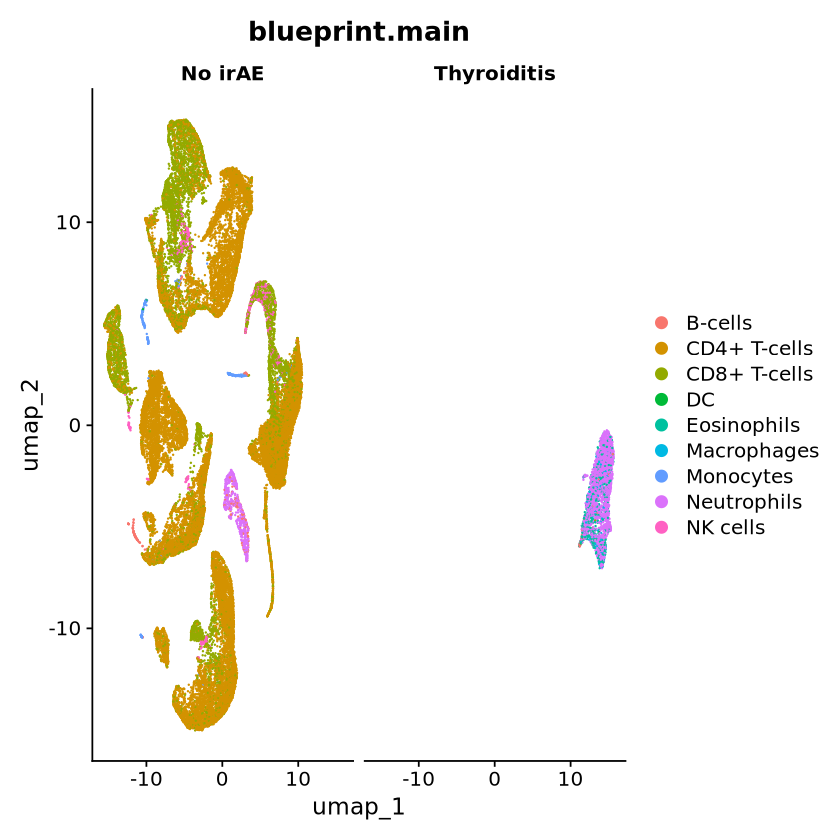

In [19]:
DimPlot(thy, group.by = "blueprint.main", split.by = 'Disease')

In [20]:
peu <- subset(obj, subset = Disease == "Pneumonitis" | Disease == "No irAE")
peu

An object of class Seurat 
97260 features across 80025 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [21]:
peu <- RunPCA(peu, npcs = 30, verbose = TRUE)
peu <- RunUMAP(peu, reduction = "pca", dims = 1:20)
peu <- FindNeighbors(peu, reduction = "pca", dims = 1:20)
peu <- FindClusters(peu, resolution = 0.5)
save(peu, file=file.path("objects", "Pneumonitis.rda"))

PC_ 1 
Positive:  CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, ENSG00000156508, ENSG00000251562, PLCB3, CD27-C0154-5p-B304139, ENSG00000166710, RP11-301G19.1, ENSG00000198804 
	   S100B, KRTAP10-10, NDUFAF1, C21orf2, ENSG00000147403, AP001059.5, AP001469.9, PFKL, KRTAP12-1, ENSG00000075624 
	   AC136616.1, KRTAP10-2, AP001062.7, LL21NC02-21A1.1, LINC00316, LINC00205, ENSG00000112306, AP001062.9, MT-CO1, RP11-706O15.3 
Negative:  HTO.7, HTO.6, HTO.4, CD4.1, CD8, HTO.2, HTO.9, HTO.1, HTO.8, CD27.1 
	   CD45RA, HTO.5, EEF1A1, RPL41, RPL10, RPS12, RPS4Y1, MALAT1, TRBV7.2, FOS 
	   HTO.3, JUN, DUSP1, B2M, AC245014.3, LTB, ZFP36, TRBV20.1, TRBV5.1, TNFAIP3 
PC_ 2 
Positive:  HTO.6, HTO.4, HTO.9, HTO.5, HTO.3, HTO.8, CD45RA, CD8, JUN, TNFAIP3 
	   FOS, NFKBIA, DUSP1, RGCC, MTRNR2L8, NR4A2, ZFP36, LMNA, MT.CO2, RPS12 
	   EEF1A1, MALAT1, MT.CO3, GNB2L1, RPL10, MT.CYB, MT.ND2, PMAIP1, MT.ATP6, MT.ND4 
Negative:  HTO.7, HTO.2, CD4-C0072-5p-B290894, GNLY, CD8-C0046-5p-B280

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 80025
Number of edges: 2608440

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9758
Number of communities: 64
Elapsed time: 14 seconds


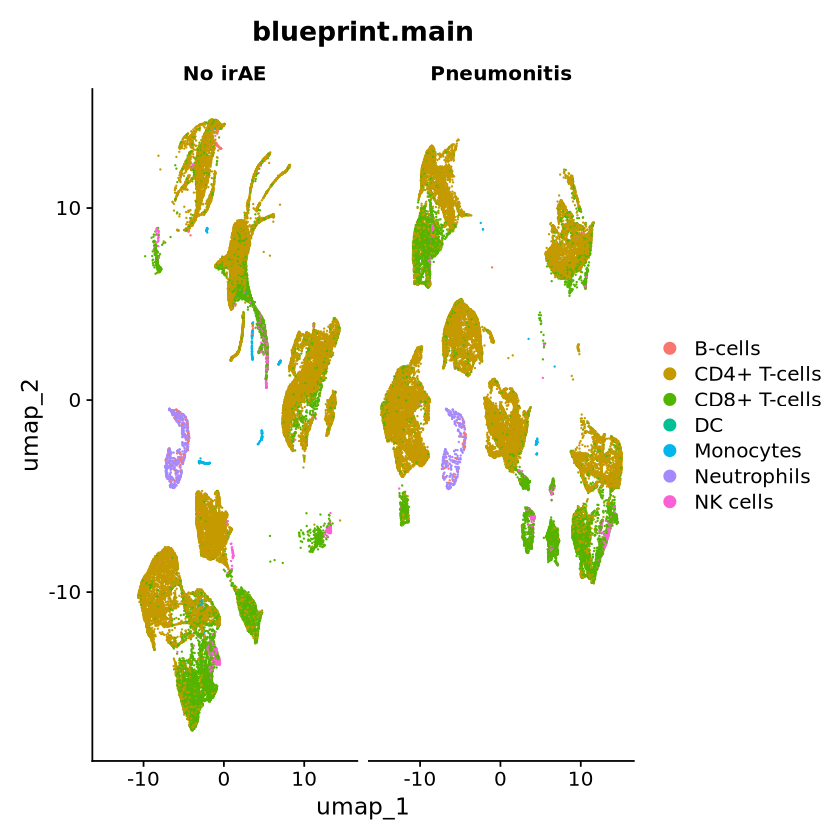

In [22]:
DimPlot(peu, group.by = "blueprint.main", split.by = 'Disease')

In [23]:
art <- subset(obj, subset = Disease == "Arthritis" | Disease == "No irAE")
art

An object of class Seurat 
97260 features across 78156 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [24]:
art <- RunPCA(art, npcs = 30, verbose = TRUE)
art <- RunUMAP(art, reduction = "pca", dims = 1:20)
art <- FindNeighbors(art, reduction = "pca", dims = 1:20)
art <- FindClusters(art, resolution = 0.5)
save(art, file=file.path("objects", "Arthritis.rda"))

PC_ 1 
Positive:  CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, ENSG00000156508, ENSG00000251562, PLCB3, CD27-C0154-5p-B304139, ENSG00000166710, RP11-301G19.1, S100B 
	   ENSG00000198804, KRTAP10-10, NDUFAF1, C21orf2, AP001059.5, ENSG00000147403, AP001469.9, KRTAP12-1, PFKL, ENSG00000075624 
	   AC136616.1, KRTAP10-2, AP001062.7, LL21NC02-21A1.1, LINC00316, LINC00205, ENSG00000112306, AP001062.9, RP11-706O15.3, ENSG00000137818 
Negative:  HTO.4, HTO.10, LYZ, CST3, CD74, S100A9, TYROBP, HTO.2, GNB2L1, HLA-B 
	   CD8, HLA-C, HLA.DRA, NKG7, FCN1, GNLY, CCL5, HLA.DRB1, HTO.5, GPX1 
	   FCER1G, MT-ND3, HLA-A, SERPINA1, HLA.DPA1, MALAT1, SPI1, ATP5E, ATP5G2, HLA-DRA 
PC_ 2 
Positive:  LYZ, CST3, MT-CO2, HLA-B, S100A9, HLA-C, TYROBP, CD74, MT-CO1, MT-ND3 
	   HLA-A, FCN1, HLA-DRA, S100A8, MT-CO3, HLA-DPA1, MT-CYB, FCER1G, HLA-DRB1, MT-ATP6 
	   SERPINA1, GPX1, HLA-DPB1, SPI1, HLA.DRA, VCAN, HLA-E, HLA-DRB5, LST1, MT-ND4 
Negative:  HTO.4, CD8, HTO.2, HTO.7, HTO.10, CD4.

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 78156
Number of edges: 2550667

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9672
Number of communities: 43
Elapsed time: 16 seconds


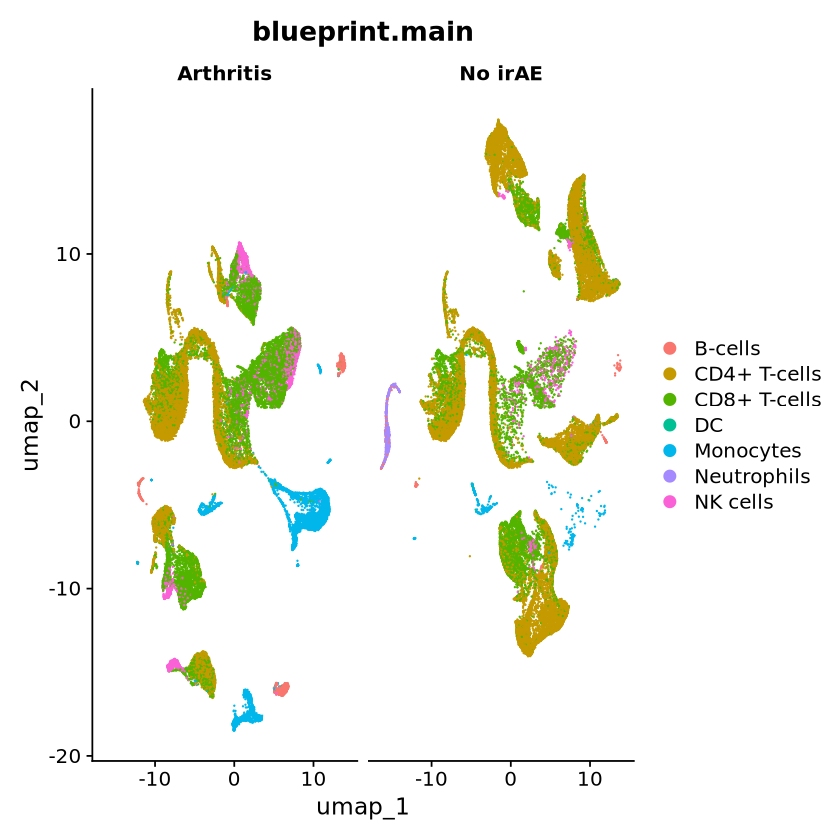

In [25]:
DimPlot(art, group.by = "blueprint.main", split.by = 'Disease')

In [26]:
tyn <- subset(obj, subset = Disease == "Thyroiditis/ Nephritis" | Disease == "No irAE")
tyn

An object of class Seurat 
97260 features across 41012 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [27]:
tyn <- RunPCA(tyn, npcs = 30, verbose = TRUE)
tyn <- RunUMAP(tyn, reduction = "pca", dims = 1:20)
tyn <- FindNeighbors(tyn, reduction = "pca", dims = 1:20)
tyn <- FindClusters(tyn, resolution = 0.5)
save(obj, file=file.path("objects", "Thyroiditis_Nephritis.rda"))

PC_ 1 
Positive:  CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, ENSG00000156508, ENSG00000251562, CD27-C0154-5p-B304139, PLCB3, ENSG00000166710, RP11-301G19.1, ENSG00000198804 
	   S100B, KRTAP10-10, NDUFAF1, ENSG00000147403, C21orf2, AP001059.5, AP001469.9, PFKL, KRTAP12-1, ENSG00000075624 
	   AC136616.1, KRTAP10-2, AP001062.7, LL21NC02-21A1.1, LINC00316, ENSG00000112306, LINC00205, AP001062.9, MT-CO1, HTO.3 
Negative:  HTO.4, HTO.7, HTO.2, HTO.5, CD4.1, CD8, HTO.6, CD27.1, CD45RA, EEF1A1 
	   RPS12, MALAT1, RPL41, RPL10, RPS4Y1, TRBV7.2, MTRNR2L8, MTRNR2L12, FOS, B2M 
	   LTB, DUSP1, TRBV5.1, TRBV20.1, JUN, TRBV3.1, TRBV7.9, MT.CO2, TNFAIP3, NFKBIA 
PC_ 2 
Positive:  HTO.4, CD8, CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, HTO.1, ENSG00000251562, ENSG00000156508, CD27-C0154-5p-B304139, CD45RA 
	   GNLY, ENSG00000198804, ENSG00000166710, PLCB3, RP11-301G19.1, ENSG00000075624, ENSG00000147403, S100B, KRTAP10-10, NDUFAF1 
	   C21orf2, AP00

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41012
Number of edges: 1321916

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9625
Number of communities: 42
Elapsed time: 4 seconds


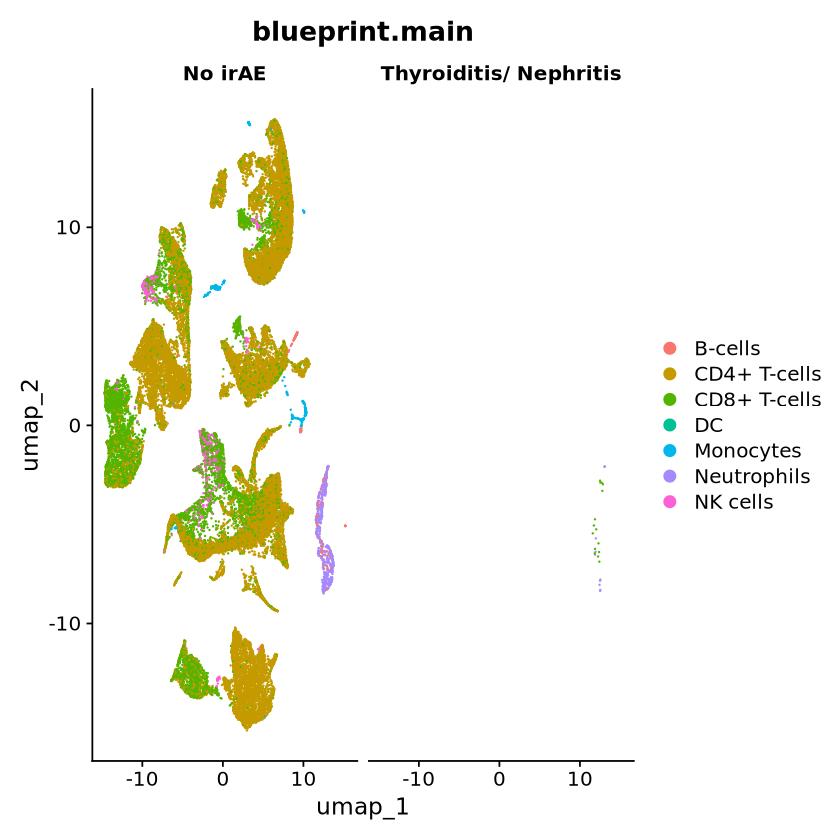

In [28]:
DimPlot(tyn, group.by = "blueprint.main", split.by = 'Disease')

In [29]:
tnn <- subset(obj, subset = Disease == "Thyroiditis/ Neurotoxicity/ Nephritis" | Disease == "No irAE")
tnn

An object of class Seurat 
97260 features across 41074 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [30]:
tnn <- RunPCA(tnn, npcs = 30, verbose = TRUE)
tnn <- RunUMAP(tnn, reduction = "pca", dims = 1:20)
tnn <- FindNeighbors(tnn, reduction = "pca", dims = 1:20)
tnn <- FindClusters(tnn, resolution = 0.5)
save(tnn, file=file.path("objects", "Thyroiditis_Neurotoxicity_Nephritis.rda"))

PC_ 1 
Positive:  CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, ENSG00000156508, ENSG00000251562, CD27-C0154-5p-B304139, PLCB3, ENSG00000166710, RP11-301G19.1, ENSG00000198804 
	   S100B, KRTAP10-10, NDUFAF1, ENSG00000147403, C21orf2, AP001059.5, AP001469.9, PFKL, ENSG00000075624, KRTAP12-1 
	   AC136616.1, KRTAP10-2, AP001062.7, LL21NC02-21A1.1, LINC00316, ENSG00000112306, LINC00205, AP001062.9, MT-CO1, HTO.3 
Negative:  HTO.4, HTO.7, HTO.2, HTO.5, CD4.1, CD8, HTO.6, CD27.1, CD45RA, EEF1A1 
	   RPS12, MALAT1, RPL41, RPL10, RPS4Y1, TRBV7.2, MTRNR2L8, MTRNR2L12, FOS, B2M 
	   LTB, DUSP1, TRBV5.1, TRBV20.1, JUN, TRBV3.1, TRBV7.9, MT.CO2, TNFAIP3, NFKBIA 
PC_ 2 
Positive:  HTO.4, CD8, CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, HTO.1, ENSG00000251562, ENSG00000156508, CD27-C0154-5p-B304139, CD45RA 
	   GNLY, ENSG00000198804, ENSG00000166710, PLCB3, RP11-301G19.1, ENSG00000075624, ENSG00000147403, S100B, KRTAP10-10, NDUFAF1 
	   ENSG000001987

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41074
Number of edges: 1323760

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9626
Number of communities: 42
Elapsed time: 5 seconds


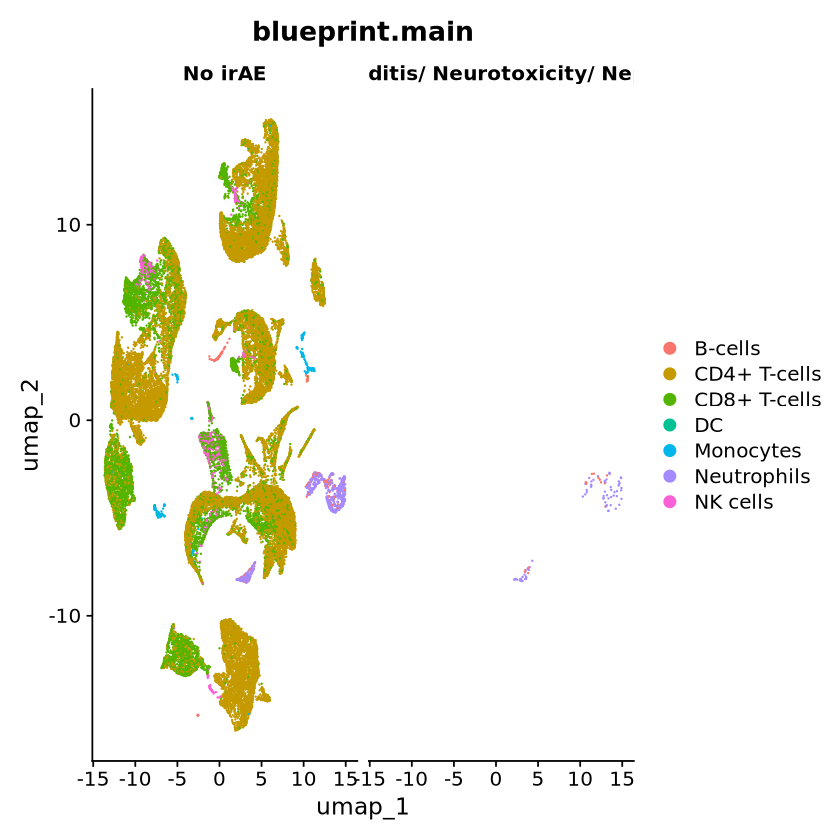

In [31]:
DimPlot(tnn, group.by = "blueprint.main", split.by = 'Disease')

In [32]:
con <- subset(obj, subset = Disease == "Colitis/ Neurotoxicity" | Disease == "No irAE")
con

An object of class Seurat 
97260 features across 41063 samples within 2 assays 
Active assay: SCT (47076 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [33]:
con <- RunPCA(con, npcs = 30, verbose = TRUE)
con <- RunUMAP(con, reduction = "pca", dims = 1:20)
con <- FindNeighbors(con, reduction = "pca", dims = 1:20)
con <- FindClusters(con, resolution = 0.5)
save(con, file=file.path("objects", "Colitis_Neurotoxicity.rda"))

PC_ 1 
Positive:  CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, ENSG00000156508, ENSG00000251562, CD27-C0154-5p-B304139, PLCB3, ENSG00000166710, RP11-301G19.1, ENSG00000198804 
	   S100B, KRTAP10-10, NDUFAF1, ENSG00000147403, C21orf2, AP001059.5, AP001469.9, PFKL, ENSG00000075624, KRTAP12-1 
	   AC136616.1, KRTAP10-2, AP001062.7, LL21NC02-21A1.1, LINC00316, ENSG00000112306, LINC00205, AP001062.9, MT-CO1, HTO.3 
Negative:  HTO.4, HTO.7, HTO.2, HTO.5, CD4.1, CD8, HTO.6, CD27.1, CD45RA, EEF1A1 
	   RPS12, MALAT1, RPL41, RPL10, RPS4Y1, TRBV7.2, MTRNR2L8, MTRNR2L12, FOS, B2M 
	   LTB, DUSP1, TRBV5.1, TRBV20.1, JUN, TRBV3.1, TRBV7.9, MT.CO2, TNFAIP3, NFKBIA 
PC_ 2 
Positive:  HTO.4, CD8, CD4-C0072-5p-B290894, CD8-C0046-5p-B280232, CD45RA-C0063-5p-B301193, HTO.1, ENSG00000251562, ENSG00000156508, CD27-C0154-5p-B304139, CD45RA 
	   GNLY, ENSG00000198804, ENSG00000166710, PLCB3, RP11-301G19.1, ENSG00000075624, ENSG00000147403, S100B, KRTAP10-10, NDUFAF1 
	   ENSG000001987

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41063
Number of edges: 1323558

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9624
Number of communities: 40
Elapsed time: 5 seconds


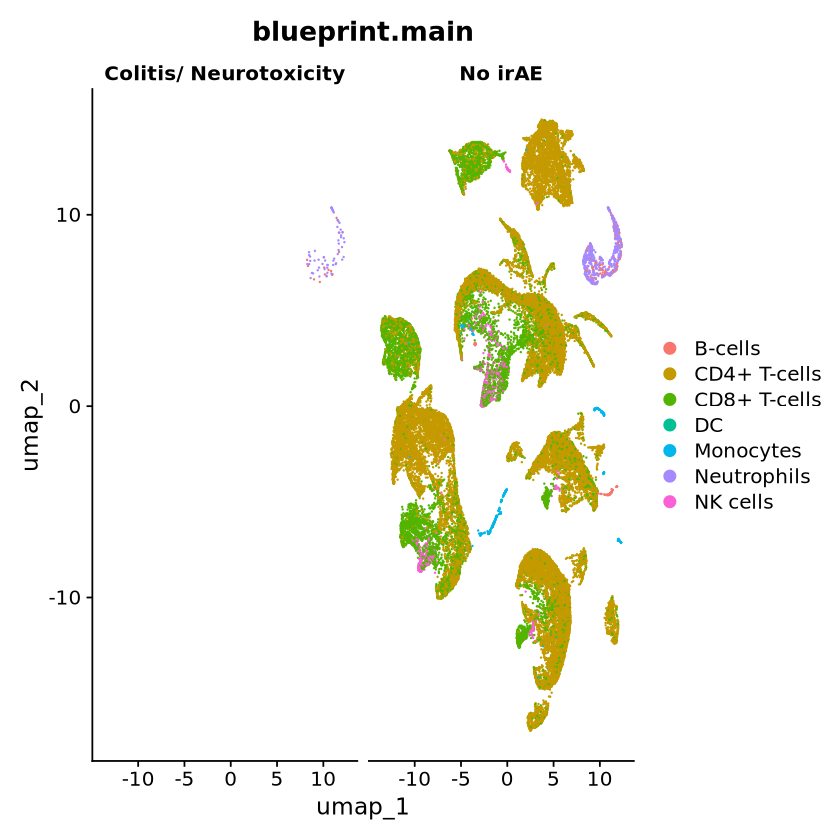

In [34]:
DimPlot(con, group.by = "blueprint.main", split.by = 'Disease')

## Only focusing on Arthritis and Pneumonitis

In [37]:
seu =  art
scConf = createConfig(seu)
makeShinyApp(seu, scConf,
             gene.mapping = TRUE,
             shiny.title = "Arthritis Tcell anti-PD-1 irAEs blood scRNA-seq",
             shiny.dir = "art_tcell_anti-pd-1_irAEs_scRNA-seq_GSE216329/",
             gex.assay = "SCT",
             default.multigene = c('LILRB1', 'PDCD1')) 
system("R -e \"shiny::runApp('art_tcell_anti-pd-1_irAEs_scRNA-seq_GSE216329')\"")

In [39]:
seu =  peu
scConf = createConfig(seu)
makeShinyApp(seu, scConf,
             gene.mapping = TRUE,
             shiny.title = "Pneumonitis Tcell anti-PD-1 irAEs blood scRNA-seq",
             shiny.dir = "pneu_tcell_anti-pd-1_irAEs_scRNA-seq_GSE216329/",
             gex.assay = "SCT",
             default.multigene = c('LILRB1', 'PDCD1')) 
system("R -e \"shiny::runApp('pneu_tcell_anti-pd-1_irAEs_scRNA-seq_GSE216329')\"")